<a href="https://colab.research.google.com/github/asma71612/cognitive-decline-monitoring/blob/main/NLP_tagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Complex transcript below with lots of filler words, contractions, and sentences. Tokenizing was completed on each sentence rather than the entire text to improve accuracy. Had an 88% accruacy when tokenizing with filler words in, but removing the knwon ones then processing resulted in tokenization accuracy of 90%

In [ ]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from collections import Counter

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')

# Define the transcript
transcript = """
Uh okay so I think it’s a kitchen. There’s um some cookies on the counter.
I don’t know, it looks like someone’s trying to uh take the cookies. A little kid maybe?
Um, well, I guess they’re trying to get the cookies right? They’re they’re kind of standing on
something, like a chair maybe? Yeah, and they look, um curious, like they want to eat them.
Oh, um, the woman she’s, uh, looking at the kid, right? I think maybe she’s, um, telling them to stop?
She looks maybe worried? Or mad? I’m not sure
Hmm, I’m not sure, maybe she’s, uh, angry because the kid is taking the cookies without asking? Or maybe, uh, she’s
just, um, worried like, the kid could get in trouble? I can’t remember if if the kid is supposed to be eating those
"""



# Tokenize the transcript first by sentence then by word since futher processing does not perform well on large chunks of text
sents = [ nltk.word_tokenize(s) for s in nltk.sent_tokenize(transcript) ]

print(sents)

# Part-of-Speech tagging
tagged_tokens = nltk.pos_tag_sents(sents)

# List of common filler words (you can expand this list as needed)
filler_words = ['uh', 'um', 'like', 'well', 'maybe', 'just', 'right', 'yeah', 'hmm']


# Remove filler words from transcript
for word in filler_words:
    transcript = re.sub(r'\b' + word + r'\b', '', transcript, flags=re.IGNORECASE)

# Tokenize the transcript first by sentence then by word since futher processing does not perform well on large chunks of text
sents_filler_removed = [ nltk.word_tokenize(s) for s in nltk.sent_tokenize(transcript) ]

# Part-of-Speech tagging
tagged_tokens_filler_removed = nltk.pos_tag_sents(sents_filler_removed)

# Count the filler words
filler_counts = {filler: sum(1 for sentence in sents for token in sentence if token.lower() == filler) for filler in filler_words}

# Word frequency (excluding stop words)
stop_words = set(stopwords.words('english'))
filtered_tokens = [word.lower() for sentence in sents for word in sentence if word.lower() not in stop_words and word.isalnum()]

# Frequency analysis of non-stop words
word_freq = Counter(filtered_tokens)

# Output the results
print("Filler Word Counts:")
for word, count in filler_counts.items():
    print(f"{word}: {count}")

print("\nTop 10 Frequent Words (excluding stop words):")
for word, count in word_freq.most_common(10):
    print(f"{word}: {count}")

print("\nPOS Tagging:")
print(tagged_tokens)

print("\nPOS Tagging (Filler Words Removed):")
print(tagged_tokens_filler_removed)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[['Uh', 'okay', 'so', 'I', 'think', 'it', '’', 's', 'a', 'kitchen', '.'], ['There', '’', 's', 'um', 'some', 'cookies', 'on', 'the', 'counter', '.'], ['I', 'don', '’', 't', 'know', ',', 'it', 'looks', 'like', 'someone', '’', 's', 'trying', 'to', 'uh', 'take', 'the', 'cookies', '.'], ['A', 'little', 'kid', 'maybe', '?'], ['Um', ',', 'well', ',', 'I', 'guess', 'they', '’', 're', 'trying', 'to', 'get', 'the', 'cookies', 'right', '?'], ['They', '’', 're', 'they', '’', 're', 'kind', 'of', 'standing', 'on', 'something', ',', 'like', 'a', 'chair', 'maybe', '?'], ['Yeah', ',', 'and', 'they', 'look', ',', 'um', 'curious', ',', 'like', 'they', 'want', 'to', 'eat', 'them', '.'], ['Oh', ',', 'um', ',', 'the', 'woman', 'she', '’', 's', ',', 'uh', ',', 'looking', 'at', 'the', 'kid', ',', 'right', '?'], ['I', 'think', 'maybe', 'she', '’', 's', ',', 'um', ',', 'telling', 'them', 'to', 'stop', '?'], ['She', 'looks', 'maybe', 'worried', '?'], ['Or', 'mad', '?'], ['I', '’', 'm', 'not', 'sure', 'Hmm', ',',

In [ ]:
#trying with spaCY Tagging instead of NLTK
import spacy
from collections import Counter
import re

# Load the spaCy language model
nlp = spacy.load("en_core_web_sm")

# Define the transcript
transcript = """
Uh okay so I think it’s a kitchen. There’s um some cookies on the counter.
I don’t know, it looks like someone’s trying to uh take the cookies. A little kid maybe?
Um, well, I guess they’re trying to get the cookies right? They’re they’re kind of standing on
something, like a chair maybe? Yeah, and they look, um curious, like they want to eat them.
Oh, um, the woman she’s, uh, looking at the kid, right? I think maybe she’s, um, telling them to stop?
She looks maybe worried? Or mad? I’m not sure
Hmm, I’m not sure, maybe she’s, uh, angry because the kid is taking the cookies without asking? Or maybe, uh, she’s
just, um, worried like, the kid could get in trouble? I can’t remember if if the kid is supposed to be eating those
"""

# List of common filler words
filler_words = ['uh', 'um', 'like', 'well', 'maybe', 'just', 'right', 'yeah', 'hmm']

# Process the transcript with spaCy
doc = nlp(transcript)

# Filler word removal
cleaned_transcript = " ".join([token.text for token in doc if token.text.lower() not in filler_words])

# Re-process the cleaned transcript with spaCy
doc_cleaned = nlp(cleaned_transcript)

# Count the filler words in the original transcript
filler_counts = Counter([token.text.lower() for token in doc if token.text.lower() in filler_words])

# Word frequency (excluding stop words)
filtered_tokens = [token.text.lower() for token in doc if not token.is_stop and token.is_alpha]
word_freq = Counter(filtered_tokens)

# POS tagging
tagged_tokens = [(token.text, token.pos_) for token in doc]
tagged_tokens_cleaned = [(token.text, token.pos_) for token in doc_cleaned]

# Output the results
print("Filler Word Counts:")
for word, count in filler_counts.items():
    print(f"{word}: {count}")

print("\nTop 10 Frequent Words (excluding stop words):")
for word, count in word_freq.most_common(10):
    print(f"{word}: {count}")

print("\nPOS Tagging (Original Transcript):")
print(tagged_tokens)

print("\nPOS Tagging (Filler Words Removed):")
print(tagged_tokens_cleaned)


Filler Word Counts:
uh: 5
um: 6
like: 4
maybe: 6
well: 1
right: 2
yeah: 1
hmm: 1
just: 1

Top 10 Frequent Words (excluding stop words):
um: 6
maybe: 6
uh: 5
kid: 5
cookies: 4
like: 4
think: 2
looks: 2
trying: 2
right: 2

POS Tagging (Original Transcript):
[('\n', 'SPACE'), ('Uh', 'INTJ'), ('okay', 'INTJ'), ('so', 'ADV'), ('I', 'PRON'), ('think', 'VERB'), ('it', 'PRON'), ('’s', 'VERB'), ('a', 'DET'), ('kitchen', 'NOUN'), ('.', 'PUNCT'), ('There', 'PRON'), ('’s', 'VERB'), ('um', 'INTJ'), ('some', 'DET'), ('cookies', 'NOUN'), ('on', 'ADP'), ('the', 'DET'), ('counter', 'NOUN'), ('.', 'PUNCT'), ('\n', 'SPACE'), ('I', 'PRON'), ('do', 'AUX'), ('n’t', 'PART'), ('know', 'VERB'), (',', 'PUNCT'), ('it', 'PRON'), ('looks', 'VERB'), ('like', 'SCONJ'), ('someone', 'PRON'), ('’s', 'AUX'), ('trying', 'VERB'), ('to', 'PART'), ('uh', 'INTJ'), ('take', 'VERB'), ('the', 'DET'), ('cookies', 'NOUN'), ('.', 'PUNCT'), ('A', 'DET'), ('little', 'ADJ'), ('kid', 'NOUN'), ('maybe', 'ADV'), ('?', 'PUNCT'), ('\n', '

SpaCY worked better so will use that for further analysis

In [ ]:
import spacy
from collections import Counter

# Load the small English model for spaCy
nlp = spacy.load("en_core_web_sm")

def lexical_content_with_pos_analysis_spacy(text):
    """
    Analyzes lexical content with part-of-speech tagging, processing sentence by sentence using spaCy.
    """
    # Process the text with spaCy NLP pipeline
    doc = nlp(text)

    # Initialize counters
    total_tokens = 0
    total_nouns = 0
    total_verbs = 0
    total_filler_words = 0
    total_open_class_words = 0
    total_closed_class_words = 0

    # Process each sentence
    for sentence in doc.sents:
        # Tokenize and apply POS tagging
        tokens = [token.text for token in sentence]
        pos_tags = [(token.text, token.pos_) for token in sentence]

        #print(pos_tags)

        # Update total token count
        total_tokens += len(tokens)

        # Count nouns and verbs based on POS tags
        noun_tags = {"NOUN", "PROPN"}  # Nouns (common, proper)
        verb_tags = {"VERB", "AUX"}  # Verbs
        filler_words_tags = {"INTJ"}

        nouns = [word for word, tag in pos_tags if tag in noun_tags]
        print("nouns: " + ", ".join(nouns))
        verbs = [word for word, tag in pos_tags if tag in verb_tags]
        print("verbs: " + ", ".join(verbs))
        filler_words = [word for word, tag in pos_tags if tag in filler_words_tags]
        print("filler_words: " + ", ".join(filler_words))

        # Open-class words: nouns, verbs, adjectives, adverbs
        open_class_tags = noun_tags | {"VERB", "ADJ", "ADV"}
        open_class_words = [word for word, tag in pos_tags if tag in open_class_tags]
        print("open_class_words: " + ", ".join(open_class_words))

        # Closed-class words: determiners, prepositions, conjunctions, pronouns, etc.
        closed_class_words = [word for word, tag in pos_tags if word.isalpha() and word not in open_class_words]
        print("closed_class_words: " + ", ".join(closed_class_words))

        # Update totals
        total_nouns += len(nouns)
        total_verbs += len(verbs)
        total_filler_words += len(filler_words)
        total_open_class_words += len(open_class_words)
        total_closed_class_words += len(closed_class_words)

    # Calculate metrics
    open_closed_ratio = (
        total_open_class_words / total_closed_class_words if total_closed_class_words else 0
    )

    return {
        "Total Sentences": len(list(doc.sents)),
        "Total Tokens": total_tokens,
        "Frequency of Nouns": total_nouns,
        "Frequency of Verbs and auxillary verbs": total_verbs,
        "Frequency of Filler Words": total_filler_words,
        "Open-Class Words": total_open_class_words,
        "Closed-Class Words": total_closed_class_words,
        "Open/Closed Class Ratio": round(open_closed_ratio, 3),
    }

# Sample text
speech_sample = """
The boy is standing on a stool reaching for the cookie jar.
The stool is tipping, and his sister is trying to hold it steady.
"""

# Run Lexical Content Analysis with POS Tagging using spaCy
lexical_pos_results_spacy = lexical_content_with_pos_analysis_spacy(transcript)
print("Lexical Content Analysis with POS Tagging (Sentence-by-Sentence) using spaCy:")
for metric, value in lexical_pos_results_spacy.items():
    print(f"  {metric}: {value}")


nouns: 
verbs: 
filler_words: 
open_class_words: 
closed_class_words: 
nouns: 
verbs: 
filler_words: Uh
open_class_words: 
closed_class_words: Uh
nouns: 
verbs: 
filler_words: okay
open_class_words: 
closed_class_words: okay
nouns: kitchen
verbs: think, ’s
filler_words: 
open_class_words: so, think, ’s, kitchen
closed_class_words: I, it, a
nouns: cookies, counter
verbs: ’s
filler_words: um
open_class_words: ’s, cookies, counter
closed_class_words: There, um, some, on, the
nouns: cookies
verbs: do, know, looks, ’s, trying, take
filler_words: uh
open_class_words: know, looks, trying, take, cookies
closed_class_words: I, do, it, like, someone, to, uh, the
nouns: kid, cookies
verbs: guess, ’re, trying, get
filler_words: Um, well
open_class_words: little, kid, maybe, guess, trying, get, cookies, right
closed_class_words: A, Um, well, I, they, to, the
nouns: chair
verbs: ’re, ’re, standing
filler_words: 
open_class_words: ’re, kind, of, standing, chair, maybe
closed_class_words: They, they, 

In [ ]:
import nltk
from collections import Counter

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')

def lexical_content_with_pos_analysis_nltk(text):
    """
    Analyzes lexical content with part-of-speech tagging, processing sentence by sentence using NLTK.
    """
    # Tokenize the text into sentences
    sentences = nltk.sent_tokenize(text)

    # Initialize counters
    total_tokens = 0
    total_nouns = 0
    total_verbs = 0
    total_filler_words = 0
    total_open_class_words = 0
    total_closed_class_words = 0

    # Define POS tag sets
    noun_tags = {"NN", "NNS", "NNP", "NNPS"}  # Nouns (common, proper)
    verb_tags = {"VB", "VBD", "VBG", "VBN", "VBP", "VBZ"}  # Verbs
    filler_words_tags = {"UH"}  # Interjections (filler words)
    open_class_tags = noun_tags | verb_tags | {"JJ", "JJR", "JJS", "RB", "RBR", "RBS"}  # Open-class
    closed_class_tags = {"DT", "IN", "CC", "PRP", "PRP$", "TO", "MD", "WP", "WP$", "WRB", "WDT", "EX"}  # Closed-class

    # Process each sentence
    for sentence in sentences:
        # Tokenize the sentence into words
        tokens = nltk.word_tokenize(sentence)
        pos_tags = nltk.pos_tag(tokens)

        # Update total token count
        total_tokens += len(tokens)

        # Count nouns and verbs based on POS tags
        nouns = [word for word, tag in pos_tags if tag in noun_tags]
        print("nouns: " + ", ".join(nouns))
        verbs = [word for word, tag in pos_tags if tag in verb_tags]
        print("verbs: " + ", ".join(verbs))
        filler_words = [word for word, tag in pos_tags if tag in filler_words_tags]
        print("filler_words: " + ", ".join(filler_words))

        # Open-class words
        open_class_words = [word for word, tag in pos_tags if tag in open_class_tags]
        print("open_class_words: " + ", ".join(open_class_words))

        # Closed-class words
        closed_class_words = [word for word, tag in pos_tags if tag in closed_class_tags]
        print("closed_class_words: " + ", ".join(closed_class_words))

        # Update totals
        total_nouns += len(nouns)
        total_verbs += len(verbs)
        total_filler_words += len(filler_words)
        total_open_class_words += len(open_class_words)
        total_closed_class_words += len(closed_class_words)

    # Calculate metrics
    open_closed_ratio = (
        total_open_class_words / total_closed_class_words if total_closed_class_words else 0
    )

    return {
        "Total Sentences": len(sentences),
        "Total Tokens": total_tokens,
        "Frequency of Nouns": total_nouns,
        "Frequency of Verbs and auxiliary verbs": total_verbs,
        "Frequency of Filler Words": total_filler_words,
        "Open-Class Words": total_open_class_words,
        "Closed-Class Words": total_closed_class_words,
        "Open/Closed Class Ratio": round(open_closed_ratio, 3),
    }

# Sample text
speech_sample = """
The boy is standing on a stool reaching for the cookie jar.
The stool is tipping, and his sister is trying to hold it steady.
"""

# Run Lexical Content Analysis with POS Tagging using NLTK
lexical_pos_results_nltk = lexical_content_with_pos_analysis_nltk(transcript)
print("Lexical Content Analysis with POS Tagging (Sentence-by-Sentence) using NLTK:")
for metric, value in lexical_pos_results_nltk.items():
    print(f"  {metric}: {value}")


nouns: Uh, kitchen
verbs: think, ’, s
filler_words: 
open_class_words: Uh, so, think, ’, s, kitchen
closed_class_words: okay, I, it, a
nouns: s, cookies, counter
verbs: ’
filler_words: 
open_class_words: ’, s, um, cookies, counter
closed_class_words: There, some, on, the
nouns: t, someone, ’, cookies
verbs: don, know, looks, s, trying, uh, take
filler_words: 
open_class_words: don, ’, t, know, looks, someone, ’, s, trying, uh, take, cookies
closed_class_words: I, it, like, to, the
nouns: kid
verbs: 
filler_words: 
open_class_words: little, kid, maybe
closed_class_words: A
nouns: Um, cookies
verbs: guess, ’, re, trying, get
filler_words: 
open_class_words: Um, well, guess, ’, re, trying, get, cookies, right
closed_class_words: I, they, to, the
nouns: kind, something, chair
verbs: ’, re, ’, standing
filler_words: 
open_class_words: ’, re, ’, re, kind, standing, something, chair, maybe
closed_class_words: They, they, of, on, like, a
nouns: 
verbs: look, want, eat
filler_words: Yeah
open_c

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import spacy

# Load spaCy's English language model
nlp = spacy.load("en_core_web_sm")

def syntactic_complexity_analysis_spacy(text):
    """
    Analyzes the syntactic complexity of a speech/text sample using spaCy.
    """
    # Process the text using spaCy
    doc = nlp(text)

    # Mean Length of Utterance (MLU): Average number of words per sentence
    sentences = list(doc.sents)
    mean_length_of_utterance = sum(len([token for token in sentence if token.is_alpha]) for sentence in sentences) / len(sentences) if sentences else 0

    # Approximate embedded clauses by counting subordinating conjunctions
    subordinating_conjunctions = ["although", "because", "since", "unless", "while", "if", "when", "that", "which", "who"]
    embedded_clauses = sum(1 for token in doc if token.text.lower() in subordinating_conjunctions)

    # Verb Index: Verbs to utterances ratio
    total_verbs = sum(1 for token in doc if token.pos_ in ["VERB", "AUX"])
    verb_index = total_verbs / len(sentences) if sentences else 0

    return {
        "Total Sentences": len(sentences),
        "Mean Length of Utterance (MLU) (Average number of words per sentence)": round(mean_length_of_utterance, 2),
        "Embedded Clauses": embedded_clauses,
        "Verb Index (verbs to utterances ratio)": round(verb_index, 2),
    }

# Sample text for analysis
speech_sample = """The boy is standing on a stool reaching for the cookie jar.
The stool is tipping, and his sister is trying to hold it steady.
"""

# Run Syntactic Complexity Analysis
syntactic_results = syntactic_complexity_analysis_spacy(speech_sample)
print("\nSyntactic Complexity Analysis (spaCy):")
for metric, value in syntactic_results.items():
    print(f"  {metric}: {value}")



Syntactic Complexity Analysis (spaCy):
  Total Sentences: 2
  Mean Length of Utterance (MLU) (Average number of words per sentence): 12.5
  Embedded Clauses: 0
  Verb Index (verbs to utterances ratio): 4.0


In [ ]:
import spacy

# Load spaCy model for semantic tagging
nlp = spacy.load("en_core_web_sm")

# Define the cookie theft semantic bank of 23 words
cookie_theft_bank = {
    "boy", "girl", "mother", "kitchen", "outside", "cookie", "jar", "stool", "sink",
    "plate", "dishcloth", "water", "window", "cupboard", "dishes", "curtains", "taking",
    "stealing", "falling", "drying", "washing", "spilling", "overflowing"
}

def analyze_semantic_content_with_cookie_theft_bank(text, duration_seconds=None):
    """
    Analyze semantic content metrics using a predefined semantic word bank.
    """
    # Process text with spaCy
    doc = nlp(text)

    # Identify semantic units: Words from the cookie theft bank
    semantic_units = [token.text.lower() for token in doc if token.text.lower() in cookie_theft_bank]
    total_words = len([token for token in doc if token.is_alpha])  # Total words excluding punctuation

    # Compute metrics
    num_semantic_units = len(semantic_units)
    idea_density = num_semantic_units / total_words if total_words else 0
    semantic_efficiency = (
        num_semantic_units / duration_seconds if duration_seconds and duration_seconds > 0 else None
    )

    return {
        "Number of Semantic Units": num_semantic_units,
        "Semantic Idea Density (Semantic Units / Total Words)": round(idea_density, 2),
        "Semantic Efficiency (Semantic Units / Speech Duration)": round(semantic_efficiency, 2)
        if semantic_efficiency is not None else "Duration not provided",
    }

# Example usage
speech_sample = "The boy is climbing on the chair to reach the cookie jar while the mother is washing dishes at the sink."
speech_duration = 30  # Duration in seconds

semantic_metrics = analyze_semantic_content_with_cookie_theft_bank(speech_sample, speech_duration)
print("\nSemantic Content Metrics:")
for metric, value in semantic_metrics.items():
    print(f"  {metric}: {value}")



Semantic Content Metrics:
  Number of Semantic Units: 7
  Semantic Idea Density (Semantic Units / Total Words): 0.33
  Semantic Efficiency (Semantic Units / Speech Duration): 0.23


In [ ]:
import spacy
import nltk
from nltk.corpus import wordnet

# Load spaCy model for semantic tagging
nlp = spacy.load("en_core_web_sm")
nltk.download('wordnet')

# Define the cookie theft semantic bank of 23 words
cookie_theft_bank = {
    "boy", "girl", "mother", "kitchen", "outside", "cookie", "jar", "stool", "sink",
    "plate", "dishcloth", "water", "window", "cupboard", "dishes", "curtains", "taking",
    "stealing", "falling", "drying", "washing", "spilling", "overflowing"
}

def get_synonyms(word):
    """
    Get synonyms for a given word using WordNet.
    """
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name().lower())
    return synonyms

# Precompute a synonym-expanded cookie theft bank
expanded_cookie_theft_bank = set(cookie_theft_bank)
for word in cookie_theft_bank:
    expanded_cookie_theft_bank.update(get_synonyms(word))

print(expanded_cookie_theft_bank)

def analyze_semantic_content_with_cookie_theft_synonyms(text, duration_seconds=None):
    """
    Analyze semantic content metrics using a predefined semantic word bank and synonyms.
    """
    # Process text with spaCy
    doc = nlp(text)

    # Identify semantic units: Words from the synonym-expanded cookie theft bank
    semantic_units = [
        token.text.lower() for token in doc if token.text.lower() in expanded_cookie_theft_bank
    ]
    total_words = len([token for token in doc if token.is_alpha])  # Total words excluding punctuation

    # Compute metrics
    num_semantic_units = len(semantic_units)
    idea_density = num_semantic_units / total_words if total_words else 0
    semantic_efficiency = (
        num_semantic_units / duration_seconds if duration_seconds and duration_seconds > 0 else None
    )

    return {
        "Number of Semantic Units": num_semantic_units,
        "Semantic Idea Density (Semantic Units / Total Words)": round(idea_density, 2),
        "Semantic Efficiency (Semantic Units / Speech Duration)": round(semantic_efficiency, 2)
        if semantic_efficiency is not None else "Duration not provided",
    }

# Example usage
speech_sample = "The boy is climbing on the chair to grab the cookie jar while the mother is drying dishes at the sink."
speech_duration = 30  # Duration in seconds

# Ensure NLTK resources are available (run this once)
import nltk
nltk.download("wordnet")

semantic_metrics = analyze_semantic_content_with_cookie_theft_synonyms(speech_sample, speech_duration)
print("\nSemantic Content Metrics:")
for metric, value in semantic_metrics.items():
    print(f"  {metric}: {value}")


{'lessen', 'pack', 'fecal_matter', 'come_down', 'subscribe_to', 'run_over', 'cup_of_tea', 'take_up', 'cooky', 'peach', 'male_child', 'slop', 'brim_over', 'curtain', 'stool', 'thievery', 'pee', 'go_under', 'well_over', 'take_on', 'cesspit', 'settle', 'accept', 'jolt', 'cupboard', 'knockout', 'hire', 'plate', 'exterior', 'direct', 'dropping', 'fetching', 'sweetheart', 'fill', 'external', 'can', 'outside', 'spill', 'submit', 'girl', 'piss', 'slump', 'take_in', 'take_a_shit', 'outdoor', 'serve_up', 'occupy', 'make', 'claim', 'talk', 'dampen', 'wash_out', 'lapse', 'aim', 'fall_off', 'fall', 'look_at', 'h2o', 'subscribe', 'strike', 'water_supply', 'dish_aerial', 'jar', 'outdoors', 'acquire', 'call_for', 'drive', 'slip', 'assume', 'return', 'windowpane', 'involve', 'extraneous', 'defecate', 'dental_plate', 'scale', 'throne', 'jounce', 'remote', 'bury', 'drapery', 'drape', 'collide', 'winning', 'light', 'irrigate', 'charter', 'beauty', 'little_girl', 'awash', 'overprotect', 'hang', 'spill_over

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#Run different Test cases with speech similar to MCI

In [ ]:
speech_1_mci = """Uh... I was... um, thinking about going to the... uh, store,
but then, I, uh, forgot what I... needed. I think it was something for dinner,
um, yeah... but I, uh, just can't remember.
"""


# Run Lexical, Semantic and Syntactic Analysis. use extimate fo speech duration for now
lexical_pos_results_1 = lexical_content_with_pos_analysis_spacy(speech_1_mci)
semantic_metrics_mci_1 = analyze_semantic_content_with_cookie_theft_bank(speech_1_mci, duration_seconds=25)  # Assuming 25 seconds
syntactic_results_mci_1 = syntactic_complexity_analysis_spacy(speech_1_mci)


print("Lexical Content Analysis with POS Tagging (Sentence-by-Sentence) using spaCy:")
for metric, value in lexical_pos_results_1.items():
    print(f"  {metric}: {value}")

print("\nSemantic Metrics:")
for metric, value in semantic_metrics_mci_1.items():
    print(f"  {metric}: {value}")

print("\nSyntactic Complexity Metrics:")
for metric, value in syntactic_results_mci_1.items():
    print(f"  {metric}: {value}")

nouns: store
verbs: was, thinking, going, forgot
filler_words: Uh, um, uh, uh
open_class_words: thinking, going, store, then, forgot, needed
closed_class_words: Uh, I, was, um, about, to, the, uh, but, I, uh, what, I
nouns: dinner
verbs: think, was
filler_words: um, yeah
open_class_words: think, dinner
closed_class_words: I, it, was, something, for, um, yeah
nouns: 
verbs: ca, remember
filler_words: uh
open_class_words: just, remember
closed_class_words: but, I, uh, ca
Lexical Content Analysis with POS Tagging (Sentence-by-Sentence) using spaCy:
  Total Sentences: 3
  Total Tokens: 55
  Frequency of Nouns: 2
  Frequency of Verbs and auxillary verbs: 8
  Frequency of Filler Words: 7
  Open-Class Words: 10
  Closed-Class Words: 24
  Open/Closed Class Ratio: 0.417

Semantic Metrics:
  Number of Semantic Units: 0
  Semantic Idea Density (Semantic Units / Total Words): 0.0
  Semantic Efficiency (Semantic Units / Speech Duration): 0.0

Syntactic Complexity Metrics:
  Total Sentences: 3
  Mea

Nouns: 2/2
verbs: 7/7
filler words: 7/7

In [ ]:
speech_2_mci = """I went to the store, and I bought some apples. Apples, you know?
I got apples, and I thought I might make a pie. Oh, and I also got some milk.
The milk... I got the milk to, uh, make the pie.
"""


# Run Lexical, Semantic and Syntactic Analysis. use extimate fo speech duration for now
lexical_pos_results_2 = lexical_content_with_pos_analysis_spacy(speech_2_mci)
semantic_metrics_mci_2 = analyze_semantic_content_with_cookie_theft_bank(speech_2_mci, duration_seconds=25)  # Assuming 25 seconds
syntactic_results_mci_2 = syntactic_complexity_analysis_spacy(speech_2_mci)


print("Lexical Content Analysis with POS Tagging (Sentence-by-Sentence) using spaCy:")
for metric, value in lexical_pos_results_2.items():
    print(f"  {metric}: {value}")

print("\nSemantic Metrics:")
for metric, value in semantic_metrics_mci_2.items():
    print(f"  {metric}: {value}")

print("\nSyntactic Complexity Metrics:")
for metric, value in syntactic_results_mci_2.items():
    print(f"  {metric}: {value}")

nouns: store, apples
verbs: went, bought
filler_words: 
open_class_words: went, store, bought, apples
closed_class_words: I, to, the, and, I, some
nouns: Apples
verbs: know
filler_words: 
open_class_words: Apples, know
closed_class_words: you
nouns: apples, pie
verbs: got, thought, might, make
filler_words: 
open_class_words: got, apples, thought, make, pie
closed_class_words: I, and, I, I, might, a
nouns: milk
verbs: got
filler_words: Oh
open_class_words: also, got, milk
closed_class_words: Oh, and, I, some
nouns: milk
verbs: 
filler_words: 
open_class_words: milk
closed_class_words: The
nouns: milk, pie
verbs: got, to, make
filler_words: uh
open_class_words: got, milk, make, pie
closed_class_words: I, the, to, uh, the
Lexical Content Analysis with POS Tagging (Sentence-by-Sentence) using spaCy:
  Total Sentences: 6
  Total Tokens: 57
  Frequency of Nouns: 9
  Frequency of Verbs: 11
  Frequency of Filler Words: 2
  Open-Class Words: 19
  Closed-Class Words: 23
  Open/Closed Class Rati

In [ ]:
speech_3_mci = """I, uh, was... looking for that thing... uh, you know, the thing that,
um, helps with... uh... I can't remember... the thing... for my, uh... uh, for my... my...
my knees... yeah, my knees...
"""


# Run Lexical, Semantic and Syntactic Analysis. use extimate fo speech duration for now
lexical_pos_results_3 = lexical_content_with_pos_analysis_spacy(speech_3_mci)
semantic_metrics_mci_3 = analyze_semantic_content_with_cookie_theft_bank(speech_3_mci, duration_seconds=25)  # Assuming 25 seconds
syntactic_results_mci_3 = syntactic_complexity_analysis_spacy(speech_3_mci)


print("Lexical Content Analysis with POS Tagging (Sentence-by-Sentence) using spaCy:")
for metric, value in lexical_pos_results_3.items():
    print(f"  {metric}: {value}")

print("\nSemantic Metrics:")
for metric, value in semantic_metrics_mci_3.items():
    print(f"  {metric}: {value}")

print("\nSyntactic Complexity Metrics:")
for metric, value in syntactic_results_mci_3.items():
    print(f"  {metric}: {value}")

nouns: thing
verbs: was, looking
filler_words: uh
open_class_words: looking, thing
closed_class_words: I, uh, was, for, that
nouns: thing
verbs: know, helps
filler_words: uh, um, uh
open_class_words: know, thing, helps
closed_class_words: uh, you, the, that, um, with, uh
nouns: thing, knees
verbs: ca, remember
filler_words: uh, uh
open_class_words: remember, thing, knees
closed_class_words: I, ca, the, for, my, uh, uh, for, my, my, my
nouns: knees
verbs: 
filler_words: yeah
open_class_words: knees
closed_class_words: yeah, my
Lexical Content Analysis with POS Tagging (Sentence-by-Sentence) using spaCy:
  Total Sentences: 4
  Total Tokens: 58
  Frequency of Nouns: 5
  Frequency of Verbs and auxillary verbs: 6
  Frequency of Filler Words: 7
  Open-Class Words: 9
  Closed-Class Words: 25
  Open/Closed Class Ratio: 0.36

MCI Speech 1 Semantic Metrics:
  Number of Semantic Units: 9
  Semantic Idea Density (Semantic Units / Total Words): 0.26
  Semantic Efficiency (Semantic Units / Speech Du

In [ ]:
speech_4_mci = """I remember going to the... uh, no, wait... it was last week,
or maybe it was... the week before? I don't know. I had, uh, a doctor's appointment,
but I forget what... um... what happened. Oh! And the car broke down... or was it the phone?
I can’t... remember.
"""


# Run Lexical, Semantic and Syntactic Analysis. use extimate fo speech duration for now
lexical_pos_results_4 = lexical_content_with_pos_analysis_spacy(speech_4_mci)
semantic_metrics_mci_4 = analyze_semantic_content_with_cookie_theft_bank(speech_4_mci, duration_seconds=25)  # Assuming 25 seconds
syntactic_results_mci_4 = syntactic_complexity_analysis_spacy(speech_4_mci)


print("Lexical Content Analysis with POS Tagging (Sentence-by-Sentence) using spaCy:")
for metric, value in lexical_pos_results_4.items():
    print(f"  {metric}: {value}")

print("\nSemantic Metrics:")
for metric, value in semantic_metrics_mci_4.items():
    print(f"  {metric}: {value}")

print("\nSyntactic Complexity Metrics:")
for metric, value in syntactic_results_mci_4.items():
    print(f"  {metric}: {value}")

nouns: 
verbs: remember, going, wait
filler_words: uh, no
open_class_words: remember, going, wait
closed_class_words: I, to, the, uh, no
nouns: week, week
verbs: was, was
filler_words: 
open_class_words: last, week, maybe, week, before
closed_class_words: it, was, or, it, was, the
nouns: 
verbs: do, know
filler_words: 
open_class_words: know
closed_class_words: I, do
nouns: doctor, appointment
verbs: had, forget
filler_words: uh
open_class_words: had, doctor, appointment, forget
closed_class_words: I, uh, a, but, I, what
nouns: 
verbs: happened
filler_words: um
open_class_words: happened
closed_class_words: um, what
nouns: 
verbs: 
filler_words: Oh
open_class_words: 
closed_class_words: Oh
nouns: car, phone
verbs: broke, was
filler_words: 
open_class_words: car, broke, phone
closed_class_words: And, the, down, or, was, it, the
nouns: 
verbs: ca, remember
filler_words: 
open_class_words: remember
closed_class_words: I, ca
Lexical Content Analysis with POS Tagging (Sentence-by-Sentence) 

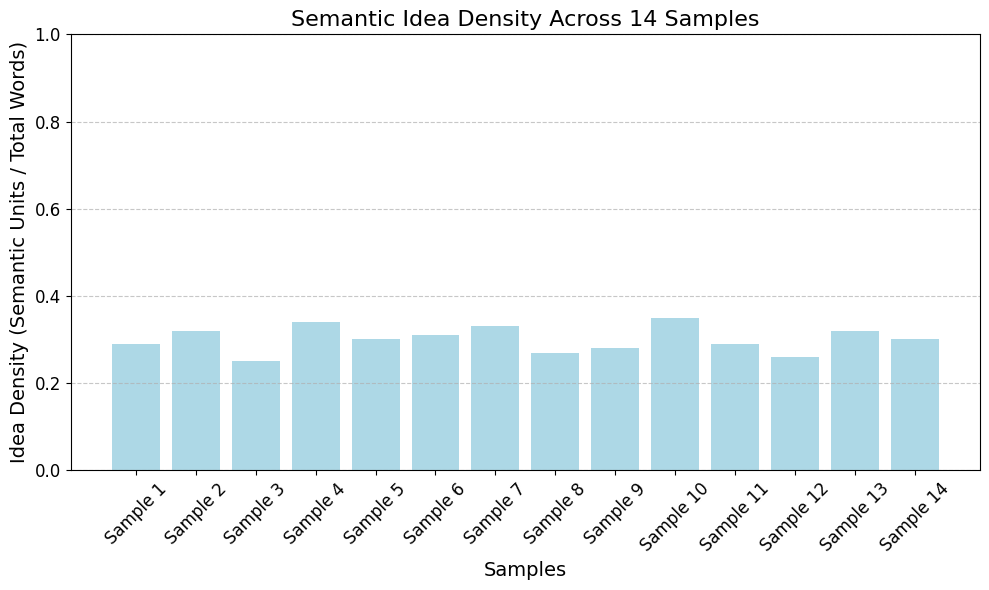

In [ ]:
import matplotlib.pyplot as plt

# Example data
samples = [f"Sample {i+1}" for i in range(14)]
idea_densities = [0.29, 0.32, 0.25, 0.34, 0.30, 0.31, 0.33, 0.27, 0.28, 0.35, 0.29, 0.26, 0.32, 0.30]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(samples, idea_densities, color='lightblue')
plt.title("Semantic Idea Density Across 14 Samples", fontsize=16)
plt.xlabel("Samples", fontsize=14)
plt.ylabel("Idea Density (Semantic Units / Total Words)", fontsize=14)
plt.ylim(0, 1)  # Idea density is a ratio between 0 and 1
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

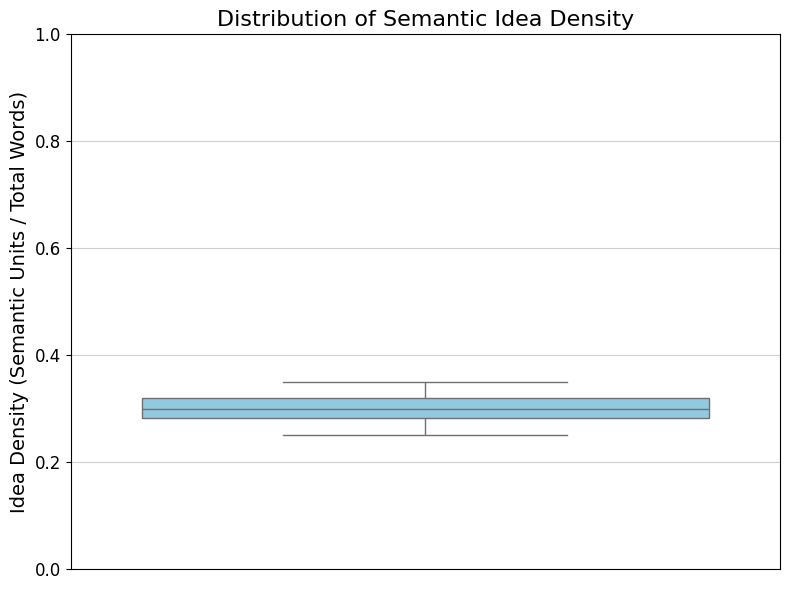

In [ ]:
import seaborn as sns

# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=idea_densities, color='skyblue')
plt.title("Distribution of Semantic Idea Density", fontsize=16)
plt.ylabel("Idea Density (Semantic Units / Total Words)", fontsize=14)
plt.ylim(0, 1)
plt.xticks(fontsize=12, ticks=[], labels=[])
plt.yticks(fontsize=12)
plt.grid(alpha=0.6)
plt.tight_layout()
plt.show()

<ipython-input-11-e54129fe95d1>:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




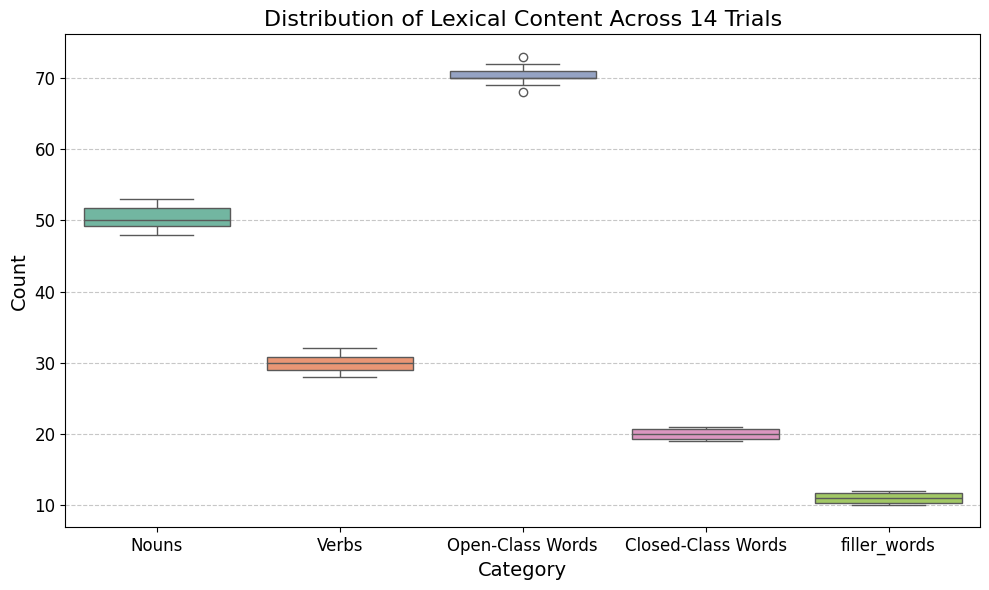

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example data for 14 trials
data = {
    "Nouns": [50, 48, 52, 49, 51, 50, 49, 53, 52, 50, 49, 51, 50, 52],
    "Verbs": [30, 32, 29, 31, 30, 29, 28, 31, 30, 30, 29, 32, 30, 29],
    "Open-Class Words": [70, 68, 72, 71, 70, 69, 70, 73, 72, 70, 71, 70, 69, 71],
    "Closed-Class Words": [20, 21, 19, 20, 21, 20, 19, 21, 20, 20, 19, 21, 20, 19],
    "filler_words": [10, 12, 11, 10, 11, 11, 10, 12, 11, 12, 11, 12, 10, 11]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for easier plotting
df_melted = df.melt(var_name="Category", value_name="Count")

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Category", y="Count", data=df_melted, palette="Set2")
plt.title("Distribution of Lexical Content Across 14 Trials", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


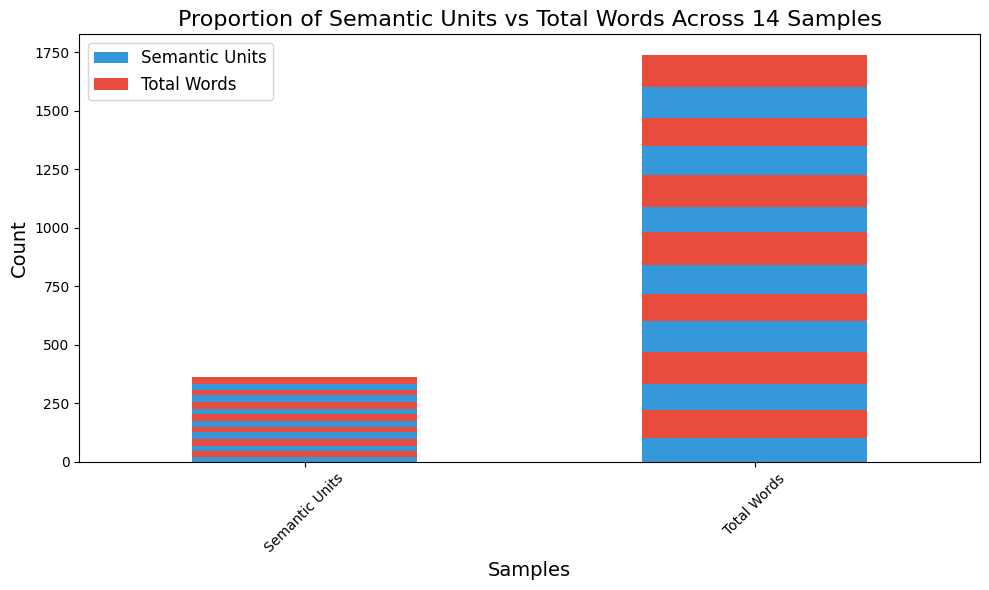

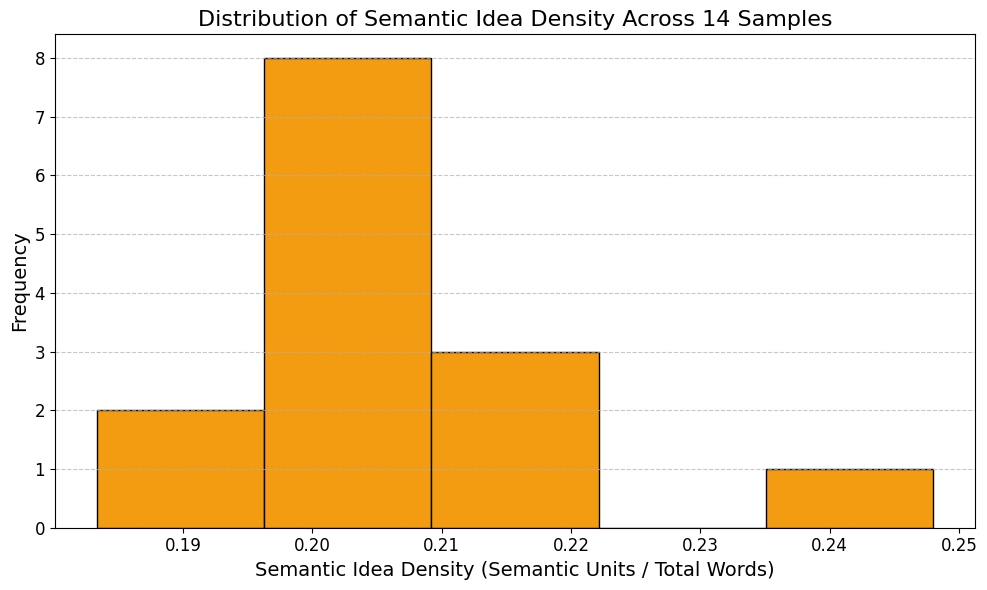

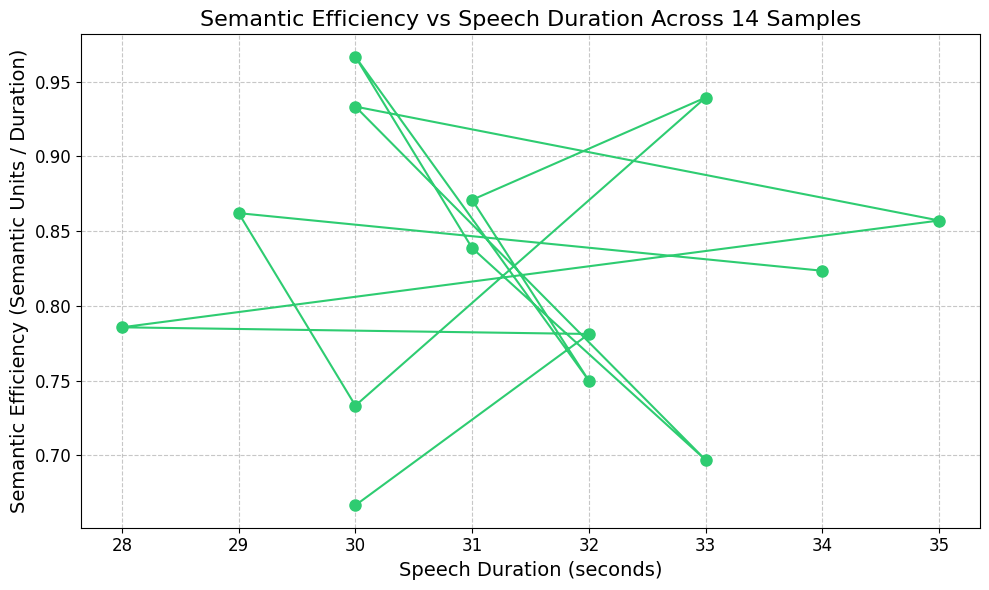

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Example data for 14 repetitions (sample data)
semantic_units = [20, 25, 22, 30, 28, 23, 26, 29, 24, 27, 31, 22, 25, 28]  # Semantic units in each sample
total_words = [100, 120, 110, 140, 130, 115, 125, 140, 110, 135, 125, 120, 130, 140]  # Total words in each sample
speech_durations = [30, 32, 28, 35, 30, 33, 31, 30, 32, 31, 33, 30, 29, 34]  # Duration of speech in seconds

# Semantic idea density (semantic units / total words)
idea_density = [su / tw if tw else 0 for su, tw in zip(semantic_units, total_words)]

# Semantic efficiency (semantic units / speech duration)
semantic_efficiency = [su / duration if duration else 0 for su, duration in zip(semantic_units, speech_durations)]

# Create DataFrame for easier handling and plotting
df = pd.DataFrame({
    'Sample': [f"Sample {i+1}" for i in range(14)],
    'Semantic Units': semantic_units,
    'Total Words': total_words,
    'Idea Density': idea_density,
    'Speech Duration': speech_durations,
    'Semantic Efficiency': semantic_efficiency
})

# 1. Stacked Bar Chart for Proportion of Semantic Units vs Total Words
fig, ax = plt.subplots(figsize=(10, 6))
df.set_index('Sample')[['Semantic Units', 'Total Words']].T.plot(kind='bar', stacked=True, ax=ax, color=['#3498db', '#e74c3c'])
ax.set_title('Proportion of Semantic Units vs Total Words Across 14 Samples', fontsize=16)
ax.set_xlabel('Samples', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.legend(['Semantic Units', 'Total Words'], fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Histogram for Semantic Idea Density
plt.figure(figsize=(10, 6))
plt.hist(idea_density, bins=5, color='#f39c12', edgecolor='black')
plt.title('Distribution of Semantic Idea Density Across 14 Samples', fontsize=16)
plt.xlabel('Semantic Idea Density (Semantic Units / Total Words)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 3. Line Graph for Semantic Efficiency
plt.figure(figsize=(10, 6))
plt.plot(df['Speech Duration'], df['Semantic Efficiency'], marker='o', color='#2ecc71', linestyle='-', markersize=8)
plt.title('Semantic Efficiency vs Speech Duration Across 14 Samples', fontsize=16)
plt.xlabel('Speech Duration (seconds)', fontsize=14)
plt.ylabel('Semantic Efficiency (Semantic Units / Duration)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


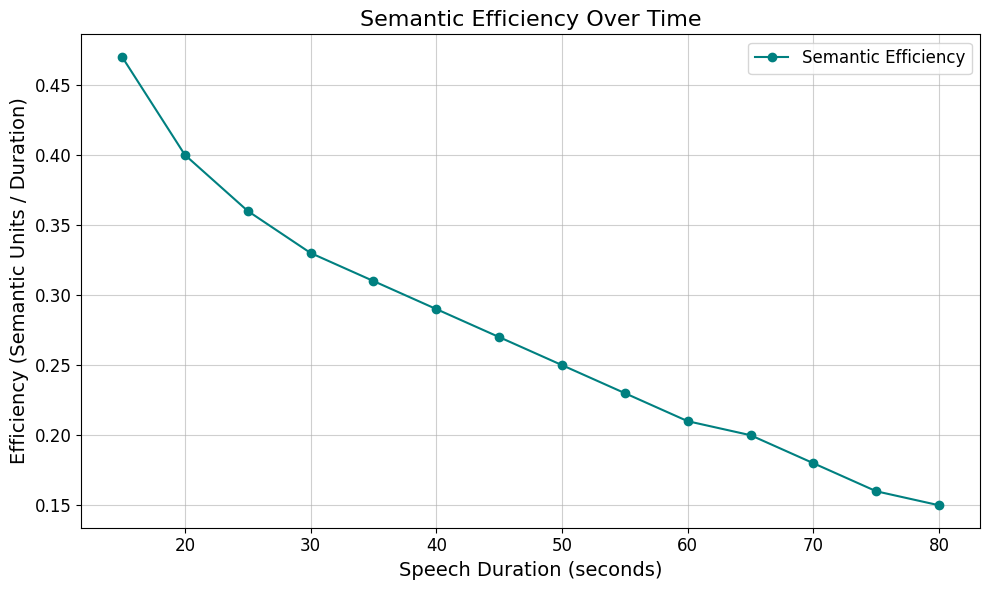

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example data with 14 time points
speech_durations = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]  # seconds
semantic_efficiencies = [0.47, 0.40, 0.36, 0.33, 0.31, 0.29, 0.27, 0.25, 0.23, 0.21, 0.20, 0.18, 0.16, 0.15]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(
    speech_durations,
    semantic_efficiencies,
    marker='o',
    color='teal',
    label="Semantic Efficiency",
    linestyle='-'
)
plt.title("Semantic Efficiency Over Time", fontsize=16)
plt.xlabel("Speech Duration (seconds)", fontsize=14)
plt.ylabel("Efficiency (Semantic Units / Duration)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.6)
plt.tight_layout()
plt.show()
